# Activity 1.1 : Introduction to Machine Learning

In [180]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Objective(s):

This activity aims to introduce how to use the different toolsets  in machine learning.

Intended Learning Outcomes (ILOs):
* Demonstrate how to use different toolsets in machine learning.
* Demonstrate how to import, manipulate and analyze data using pandas and numpy.
* Demonstrate how to visualize data in graphs using matplotlib and seaborn


Resources:
* Jupyter Notebook
* Iris_Data.csv


Procedure:

The iris data set will be used for this activity. It is a well-known data set containing iris species and sepal and petal measurements.

Import the libraries and the dataset

In [181]:
#import the libraries
import pandas as pd
import numpy as np

# import the dataset
data = pd.read_csv('/content/drive/MyDrive/Iris_Data.csv')
#check the content of the dataframe
data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Determine the following:
* The number of data points (rows).
* The column names.
* The data types for each column.

In [182]:
#the number of datapoints
print(data.shape[0])

#the column names
print(data.columns.tolist())

#the data types for each column
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

In [183]:
#remove the 'Iris-' portion of the name
data['species'] = data.species.str.replace('Iris-', '')
data.head()


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Determine the following:
* The number of each species present.
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

In [184]:
#the number of each species present
data.species.value_counts()

# the mean, median and quartiles and ranges
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df



sepal_length  sepal_width  petal_length  petal_width
mean        5.843333        3.054      3.758667     1.198667
25%         5.100000        2.800      1.600000     0.300000
median      5.800000        3.000      4.350000     1.300000
75%         6.400000        3.300      5.100000     1.800000
range       3.600000        2.400      5.900000     2.400000

Calculate the following for each species in a separate dataframe:
* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

In [185]:
# The mean calculation
data.groupby('species').mean()



sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

In [186]:
# The median calculation
data.groupby('species').median()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0

In [187]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

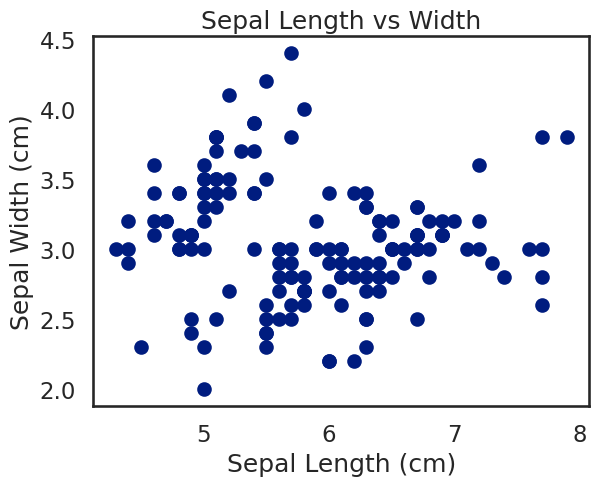

In [188]:
#Scatter plot of sepal_length versus sepal_width using Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');


Interpret the result of the scatter plot.

**Answer: Based on the graph shown above, the data points are spread across various values around certain ranges. The dispersion in the graph above might refers at different kinds of flower species or categories. Wherein each group could show a distinct patter or ranges of measurements. I think if we are going to apply clustering techniques we could possibly indentify possible groups or species.**

Make a histogram of any one of the four features. Label axes and title it as appropriate. What is the function of the histogram ?

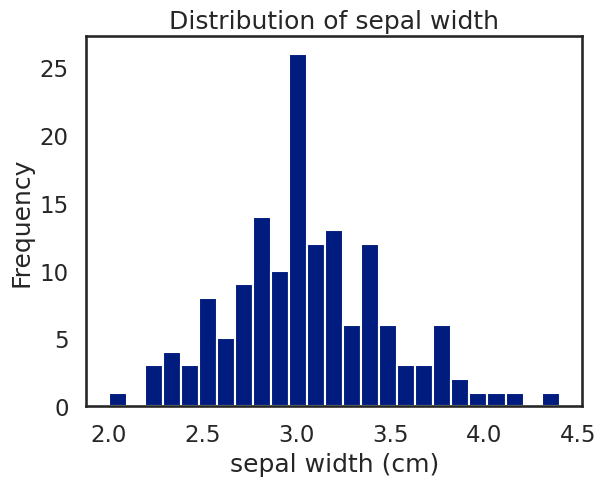

In [189]:
# for this histogram I want to identify the distribution of sepal width of all the flower species in the data set

ax = plt.axes()
ax.hist(data.sepal_width, bins = 25);

ax.set(xlabel = 'sepal width (cm)', ylabel = 'Frequency', title = "Distribution of sepal width");

Text(0.5, 1.0, 'Distribution of sepal width')

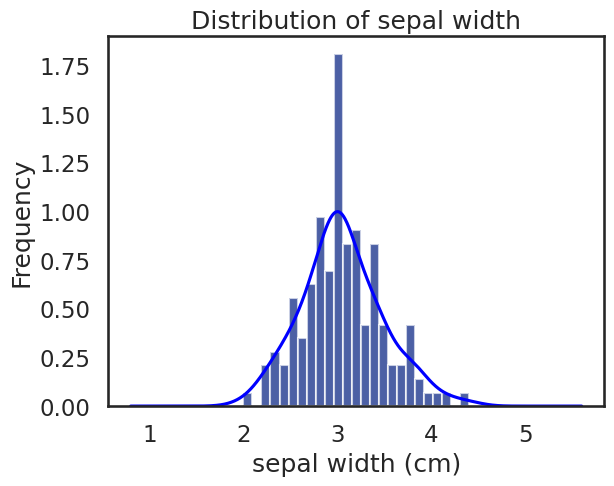

In [190]:
ax = data.sepal_width.plot(kind ='hist', density = True, alpha =0.7, bins = 25)
data.sepal_width.plot(ax = ax, kind = 'kde', color = 'blue')
plt.xlabel('sepal width (cm)')
plt.ylabel('Frequency')
plt.title("Distribution of sepal width")

**Answer: The histogram uses to provide a clear visual summary of the distribution of the dataset, give the frequency of values, and dispersion of data points. Which may help us to understand an underlaying patterns in our data.**

**Additionally I tried to apply kde graph along width histogram graph. With this, I think I was able to identify an outlier in the data.**

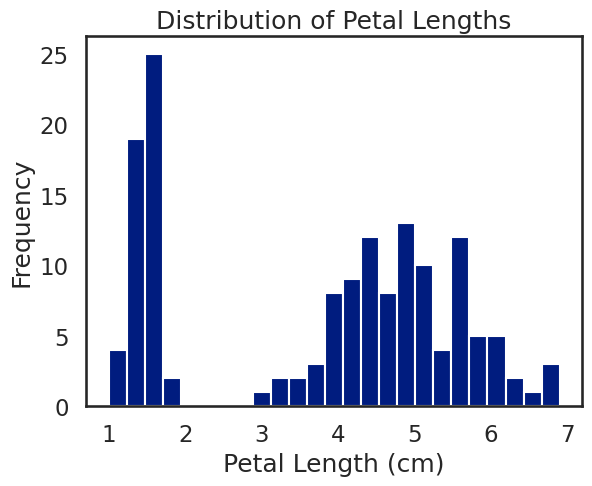

In [191]:
#histogram
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

# the graph shown below  shows the distribution of the petal lengths among the species of the flowers
# I think having this kind of distribution doesnt mean that the values on the left are all outliers since there is a gap. Instead, having multiple peaks might show that there is a differt groups or species in our data.

Make a boxplot of each petal and sepal measurement. What is the function of the boxplot?

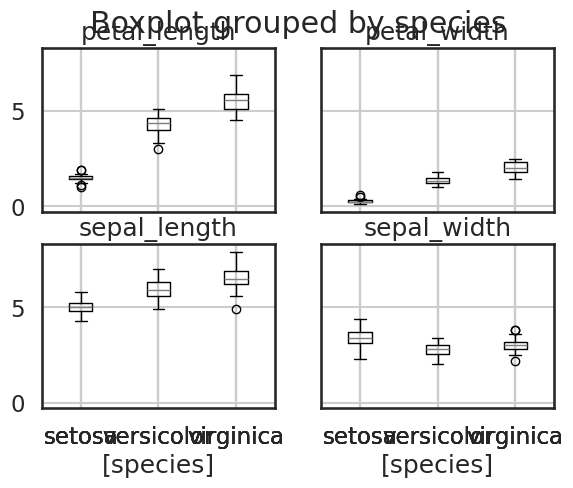

In [192]:
#boxplot
data.boxplot(by='species');

**Answer: A box plot provides a clear, concise summary of a dataset’s distribution, central tendency, spread, and outliers, making it a useful tool for exploratory data analysis and comparison. This is the common kind of graph that Im using when Im checking for the outliers in the datasets.**

Make a single boxplot where the features are separated in the x-axis and species are colored with different hues.

In [193]:
#single boxplot
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

species   measurement  size
0  setosa  sepal_length   5.1
1  setosa   sepal_width   3.5
2  setosa  petal_length   1.4
3  setosa   petal_width   0.2
4  setosa  sepal_length   4.9

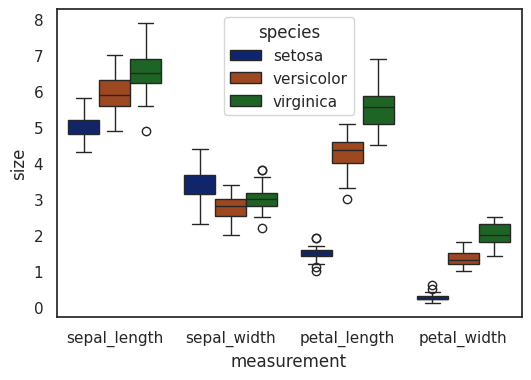

In [194]:
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size',
            hue='species', data=plot_data);

Make a pairplot with Seaborn to examine the correlation between each of the measurements.

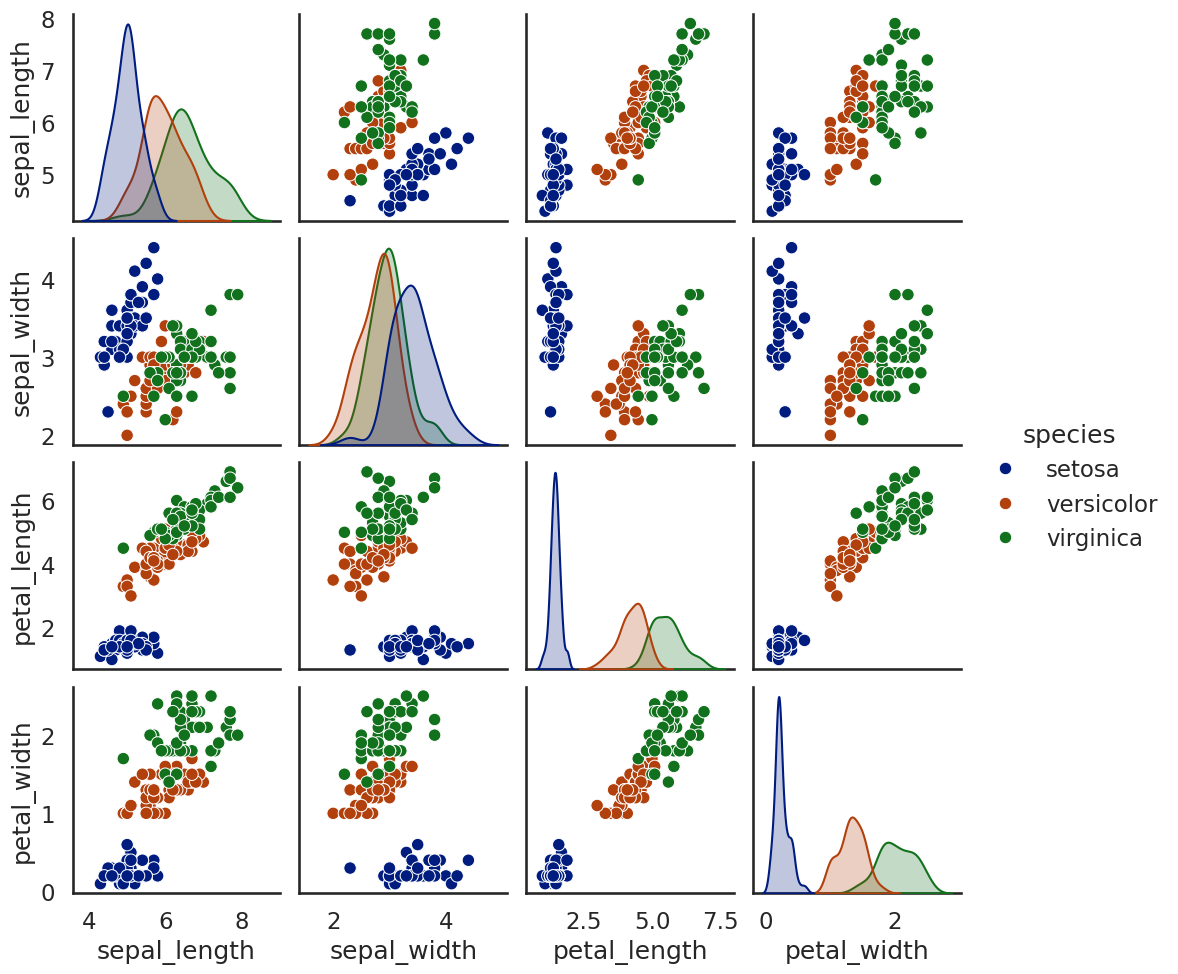

In [195]:
#pair plot
sns.set_context('talk')
sns.pairplot(data, hue='species');



Interpret the result of correlation using the pairplot

**Answer: The pairplot graph above shows a positive correlation on some features, paticularly in the correlation between the petal length and petal width. There is a noticealbe separation between species based on the measurements, which indicates that these features can help to distinguish the species.**

<font size = 6><b>Supplementary Activity:</b></font>
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values.
* Perform descriptive statistics such as mean, median and mode
* Compare and analyze your data using data visualization

<font size = 5><b>Import the dataset</font>

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/BSCPE31S3-CPE312/personality_synthetic_dataset.csv')

df.head()

personality_type  social_energy  alone_time_preference  talkativeness  \
0        Extrovert       6.794295               3.854670       8.725446   
1         Ambivert       6.378988               5.731157       7.029529   
2         Ambivert       7.459421               6.322263       3.922269   
3        Extrovert       6.159626               3.097837       6.019093   
4        Introvert       5.568462               6.986722       3.913240   

   deep_reflection  group_comfort  party_liking  listening_skill   empathy  \
0         2.515151       7.097368      8.588762         6.774799  6.430132   
1         7.274493       4.111199      3.258248         5.550909  3.958179   
2         4.622261       5.343276      7.452152         9.483990  6.127654   
3         1.965440       7.837140     10.000000         9.436733  8.949684   
4         9.926161       1.650483      0.362298         7.470387  6.756837   

   creativity  ...  spontaneity  adventurousness  reading_habit  \
0    6.142968  ...     4.853313         8.257134       5.270555   
1    6.149457  ...     6.067201         6.289347       5.753165   
2    7.032017  ...     5.524244         9.238784       5.250405   
3    8.923875  ...     4.327018         8.489791       5.312617   
4    9.507803  ...     5.187689         3.167217       7.060235   

   sports_interest  online_social_usage  travel_desire  gadget_usage  \
0        10.000000             9.154296       4.816422      9.191711   
1         5.334303             4.683781       4.725666      5.956141   
2         3.153540             5.000338       6.139166      6.033048   
3         8.379936             7.601946       6.370056      5.410145   
4         2.333388             7.771569       5.534336      5.704598   

   work_style_collaborative  decision_speed  stress_handling  
0                  8.313590        8.032376         7.176905  
1                  5.890619        3.158988         3.423577  
2                  5.807500        4.571003         5.647480  
3                  6.671781        6.600233         5.870088  
4                  5.832968        5.813099         3.758084  

[5 rows x 30 columns]

<font size = 5><b>Determing the number of datapoints, columns and data types<font size= 5>

In [197]:
# Identifying the number of datapoints
print(f'No. of datapoints: {df.shape[0]}')

# Identifying the number of columns
print(f'No. of columns: {df.shape[1]}')

No. of datapoints: 20000
No. of columns: 30


In [198]:
# Identifying the names of the columns

print(df.columns.tolist())

['personality_type', 'social_energy', 'alone_time_preference', 'talkativeness', 'deep_reflection', 'group_comfort', 'party_liking', 'listening_skill', 'empathy', 'creativity', 'organization', 'leadership', 'risk_taking', 'public_speaking_comfort', 'curiosity', 'routine_preference', 'excitement_seeking', 'friendliness', 'emotional_stability', 'planning', 'spontaneity', 'adventurousness', 'reading_habit', 'sports_interest', 'online_social_usage', 'travel_desire', 'gadget_usage', 'work_style_collaborative', 'decision_speed', 'stress_handling']


In [199]:
# Identifying the datatype of the datatypes of the dataset

df.dtypes

personality_type             object
social_energy               float64
alone_time_preference       float64
talkativeness               float64
deep_reflection             float64
group_comfort               float64
party_liking                float64
listening_skill             float64
empathy                     float64
creativity                  float64
organization                float64
leadership                  float64
risk_taking                 float64
public_speaking_comfort     float64
curiosity                   float64
routine_preference          float64
excitement_seeking          float64
friendliness                float64
emotional_stability         float64
planning                    float64
spontaneity                 float64
adventurousness             float64
reading_habit               float64
sports_interest             float64
online_social_usage         float64
travel_desire               float64
gadget_usage                float64
work_style_collaborative    float64
decision_speed              float64
stress_handling             float64
dtype: object

In [200]:
# Identifying all the unique names of the target
df['personality_type'].unique()

array(['Extrovert', 'Ambivert', 'Introvert'], dtype=object)

<font size= 5><b>Remove unneccesary columns</b></font>

- Since I can use all the 29 features in the data set in creating visualizations. Im just going to pick top 6 most important feature in classifying the personality type of the person.

In [201]:
# Instead of dropping all the 20 columns I just going to create new dataframe
personality = df[['personality_type','party_liking','talkativeness','social_energy','excitement_seeking','alone_time_preference','public_speaking_comfort']]

personality.head()

personality_type  party_liking  talkativeness  social_energy  \
0        Extrovert      8.588762       8.725446       6.794295   
1         Ambivert      3.258248       7.029529       6.378988   
2         Ambivert      7.452152       3.922269       7.459421   
3        Extrovert     10.000000       6.019093       6.159626   
4        Introvert      0.362298       3.913240       5.568462   

   excitement_seeking  alone_time_preference  public_speaking_comfort  
0            8.916668               3.854670                 8.618033  
1            6.494122               5.731157                 5.018526  
2            4.054730               6.322263                 6.474164  
3            9.442942               3.097837                 7.269755  
4            4.149461               6.986722                 2.779744

<font size =5><b>Do data cleaning such as removing empty values.</b></font>

In [202]:
# determine if there are null values in each columns of the dataset

personality.isnull().sum()

personality_type           0
party_liking               0
talkativeness              0
social_energy              0
excitement_seeking         0
alone_time_preference      0
public_speaking_comfort    0
dtype: int64

In [203]:
# determine if there are duplicated rows
print(personality.duplicated().sum())

0


In [204]:
# checking the datatype again if there are wrong
personality.dtypes

personality_type            object
party_liking               float64
talkativeness              float64
social_energy              float64
excitement_seeking         float64
alone_time_preference      float64
public_speaking_comfort    float64
dtype: object

In [205]:
# checking for duplicated column names

personality.columns.duplicated()

array([False, False, False, False, False, False, False])

**So far, the dataset is clean. Now I'm moving forward to next task**

<font size = 5><b>Perform descriptive statistics such as mean, median and mode</font>

In [206]:
# First lets check for the values of each personality that is present in our dataset
personality.personality_type.value_counts()

# Based on the result the data set is balance when it comes to the number of data for each personlality type.
# Which means there are no bias towards the majority of the personality type.

personality_type
Extrovert    6857
Ambivert     6573
Introvert    6570
Name: count, dtype: int64

In [207]:
# get the summary of the descriptive statistics. With this we can get the mean, min

stat_personality = personality.describe()
stat_personality

party_liking  talkativeness  social_energy  excitement_seeking  \
count  20000.000000   20000.000000   20000.000000        20000.000000   
mean       5.040063       5.525955       5.509190            5.528619   
std        2.810563       2.488006       2.468526            2.488922   
min        0.000000       0.000000       0.000000            0.000000   
25%        2.727584       3.595866       3.590989            3.604003   
50%        5.053005       5.574786       5.540706            5.544744   
75%        7.363676       7.472371       7.424123            7.501737   
max       10.000000      10.000000      10.000000           10.000000   

       alone_time_preference  public_speaking_comfort  
count           20000.000000             20000.000000  
mean                5.454690                 5.512280  
std                 2.493731                 2.473666  
min                 0.000000                 0.000000  
25%                 3.509578                 3.614361  
50%                 5.464038                 5.534720  
75%                 7.416314                 7.442047  
max                10.000000                10.000000

In [208]:
# get the interquartile range and range before we find the outliers in our data

stat_personality.loc['IQR'] = stat_personality.loc['75%'] - stat_personality.loc['25%']
stat_personality.loc['range'] = stat_personality.loc['max'] - stat_personality.loc['min']
stat_personality

party_liking  talkativeness  social_energy  excitement_seeking  \
count  20000.000000   20000.000000   20000.000000        20000.000000   
mean       5.040063       5.525955       5.509190            5.528619   
std        2.810563       2.488006       2.468526            2.488922   
min        0.000000       0.000000       0.000000            0.000000   
25%        2.727584       3.595866       3.590989            3.604003   
50%        5.053005       5.574786       5.540706            5.544744   
75%        7.363676       7.472371       7.424123            7.501737   
max       10.000000      10.000000      10.000000           10.000000   
IQR        4.636093       3.876505       3.833134            3.897734   
range     10.000000      10.000000      10.000000           10.000000   

       alone_time_preference  public_speaking_comfort  
count           20000.000000             20000.000000  
mean                5.454690                 5.512280  
std                 2.493731                 2.473666  
min                 0.000000                 0.000000  
25%                 3.509578                 3.614361  
50%                 5.464038                 5.534720  
75%                 7.416314                 7.442047  
max                10.000000                10.000000  
IQR                 3.906737                 3.827686  
range              10.000000                10.000000

In [209]:
# get the mode of the each features in our data set
mode = personality[['party_liking','talkativeness','social_energy','excitement_seeking','alone_time_preference','public_speaking_comfort']].mode()

for col in mode:
  stat_personality.loc['mode', col] = mode[col][0]


# get the mean, median, mode, range, IQR, and percentile from the summary statistics that we have currently

stat_fields = ['mean','25%','50%','75%','range','mode','IQR']
stat_personality = stat_personality.loc[stat_fields]
stat_personality.rename({'50%': 'median'}, inplace = True)
stat_personality

party_liking  talkativeness  social_energy  excitement_seeking  \
mean        5.040063       5.525955       5.509190            5.528619   
25%         2.727584       3.595866       3.590989            3.604003   
median      5.053005       5.574786       5.540706            5.544744   
75%         7.363676       7.472371       7.424123            7.501737   
range      10.000000      10.000000      10.000000           10.000000   
mode       10.000000      10.000000      10.000000           10.000000   
IQR         4.636093       3.876505       3.833134            3.897734   

        alone_time_preference  public_speaking_comfort  
mean                 5.454690                 5.512280  
25%                  3.509578                 3.614361  
median               5.464038                 5.534720  
75%                  7.416314                 7.442047  
range               10.000000                10.000000  
mode                10.000000                10.000000  
IQR                  3.906737                 3.827686

In [210]:
# find the mean, median of every features in each personality type
personality.groupby('personality_type').agg(['mean','median'])

party_liking           talkativeness           social_energy  \
                         mean    median          mean    median          mean   
personality_type                                                                
Ambivert             4.983452  4.986989      5.505193  5.527311      5.487189   
Extrovert            7.961159  8.027266      7.951506  8.018230      7.899779   
Introvert            2.048000  1.967049      3.015219  2.990143      3.036183   

                           excitement_seeking           alone_time_preference  \
                    median               mean    median                  mean   
personality_type                                                                
Ambivert          5.502030           5.523381  5.503770              5.499532   
Extrovert         7.954894           7.941410  8.011384              3.008493   
Introvert         3.027945           3.015670  3.027233              7.962882   

                           public_speaking_comfort            
                    median                    mean    median  
personality_type                                              
Ambivert          5.520742                5.498913  5.499124  
Extrovert         2.982585                7.923062  7.952570  
Introvert         8.044487                3.009559  3.010869

<font size = 5><b>Compare and analyze your data using data visualization</font>

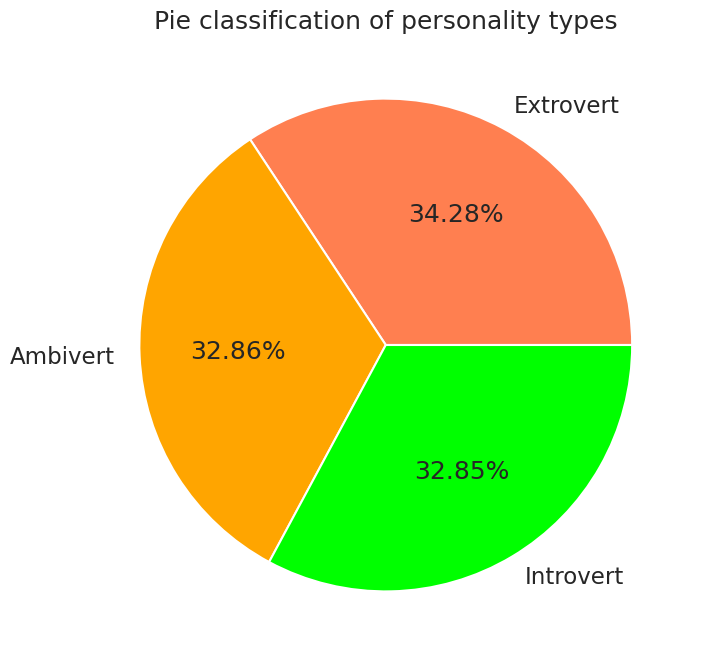

In [211]:
# find the distribution of the personality type using pie chart

targets = personality['personality_type'].value_counts(normalize = True)
colors = ['coral','orange','lime']
targets.plot(kind = 'pie', figsize = (12,8), autopct = '%1.2f%%', colors = colors, legend=False, ylabel= '')
plt.title('Pie classification of personality types')

plt.show()

# This visualization shows the distribution of datapoints in every personality types.
# As you can see the graph shows a balance proportion of datapoints in each personality types which is good in practicing machine learning to avoid bias over the majority of the personality type

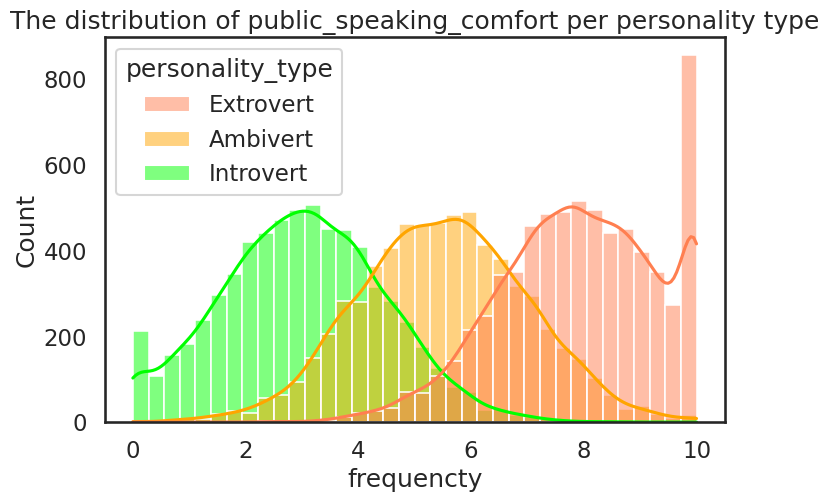

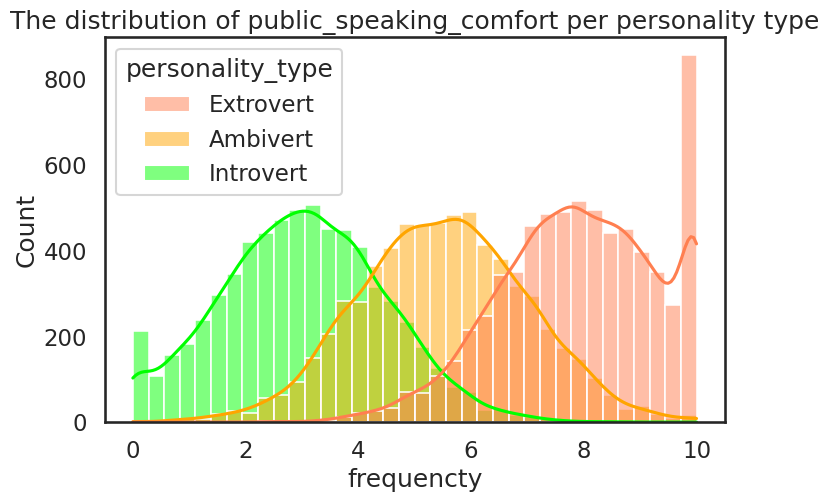

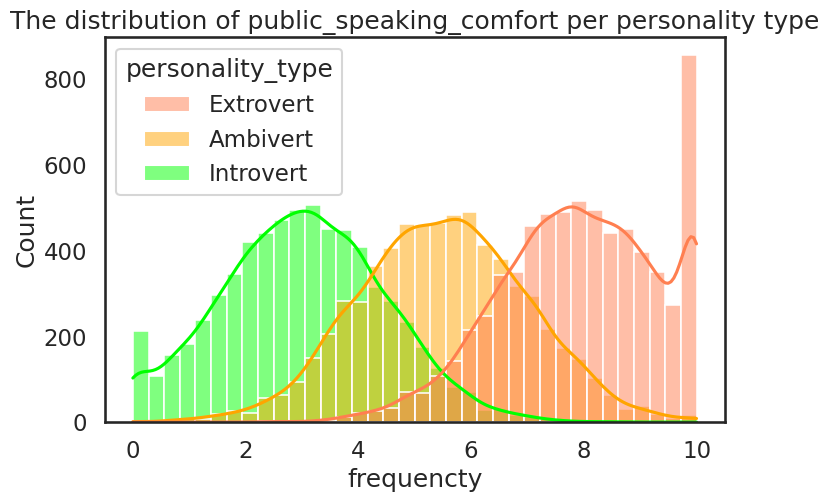

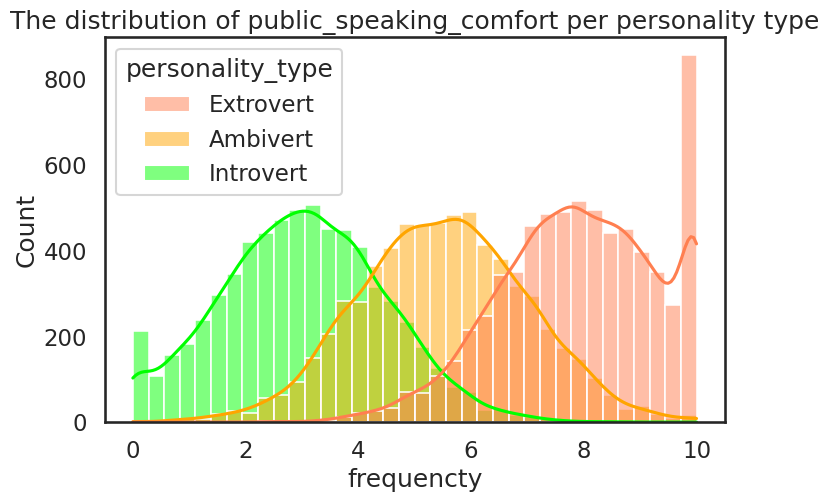

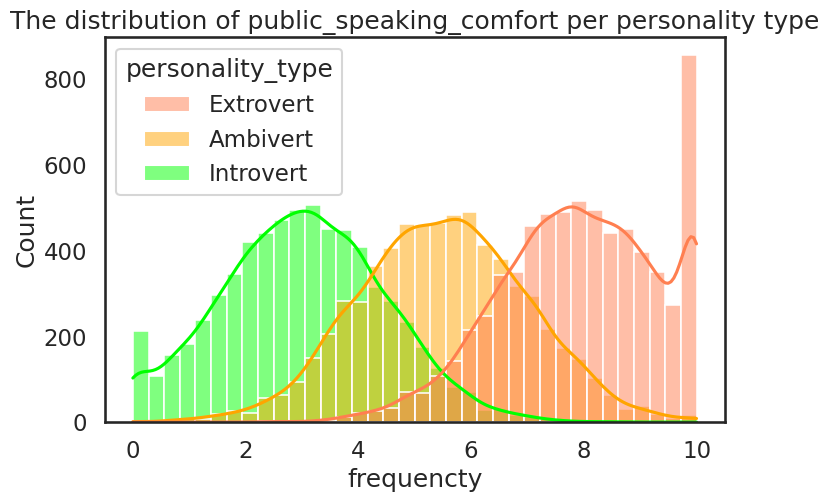

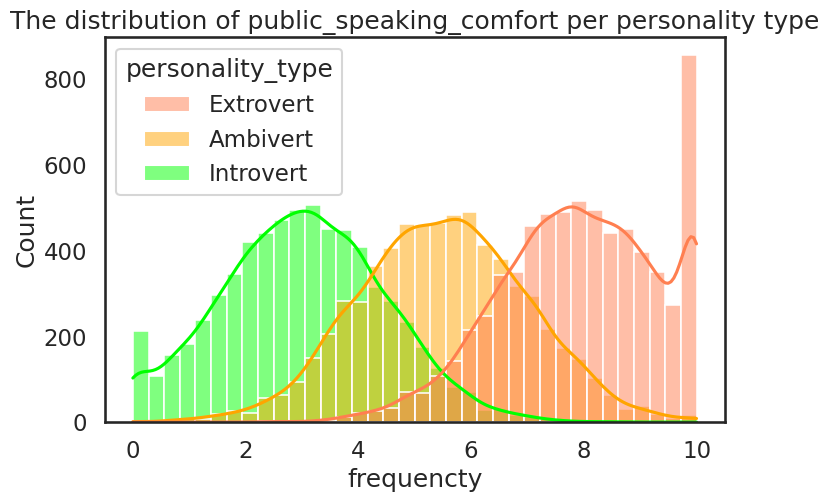

In [213]:
# Create a histogram plot for each feature of the personality type

features = personality.drop(columns = ['personality_type'])

for column in features:
  plt.figure(figsize = (8,5))
  sns.histplot(data= personality, x = col, hue= "personality_type", palette = colors, kde =True)
  plt.title(f'The distribution of {col} per personality type')
  plt.xlabel("frequencty")
  plt.show()

# Base on he histogram graph that shown below it is able to provide a clear visual summary of the distribution of every features of each personal type
# I also added kde graph on each histogram inorder for us to make it easier to compare distribution to different kinds of groups

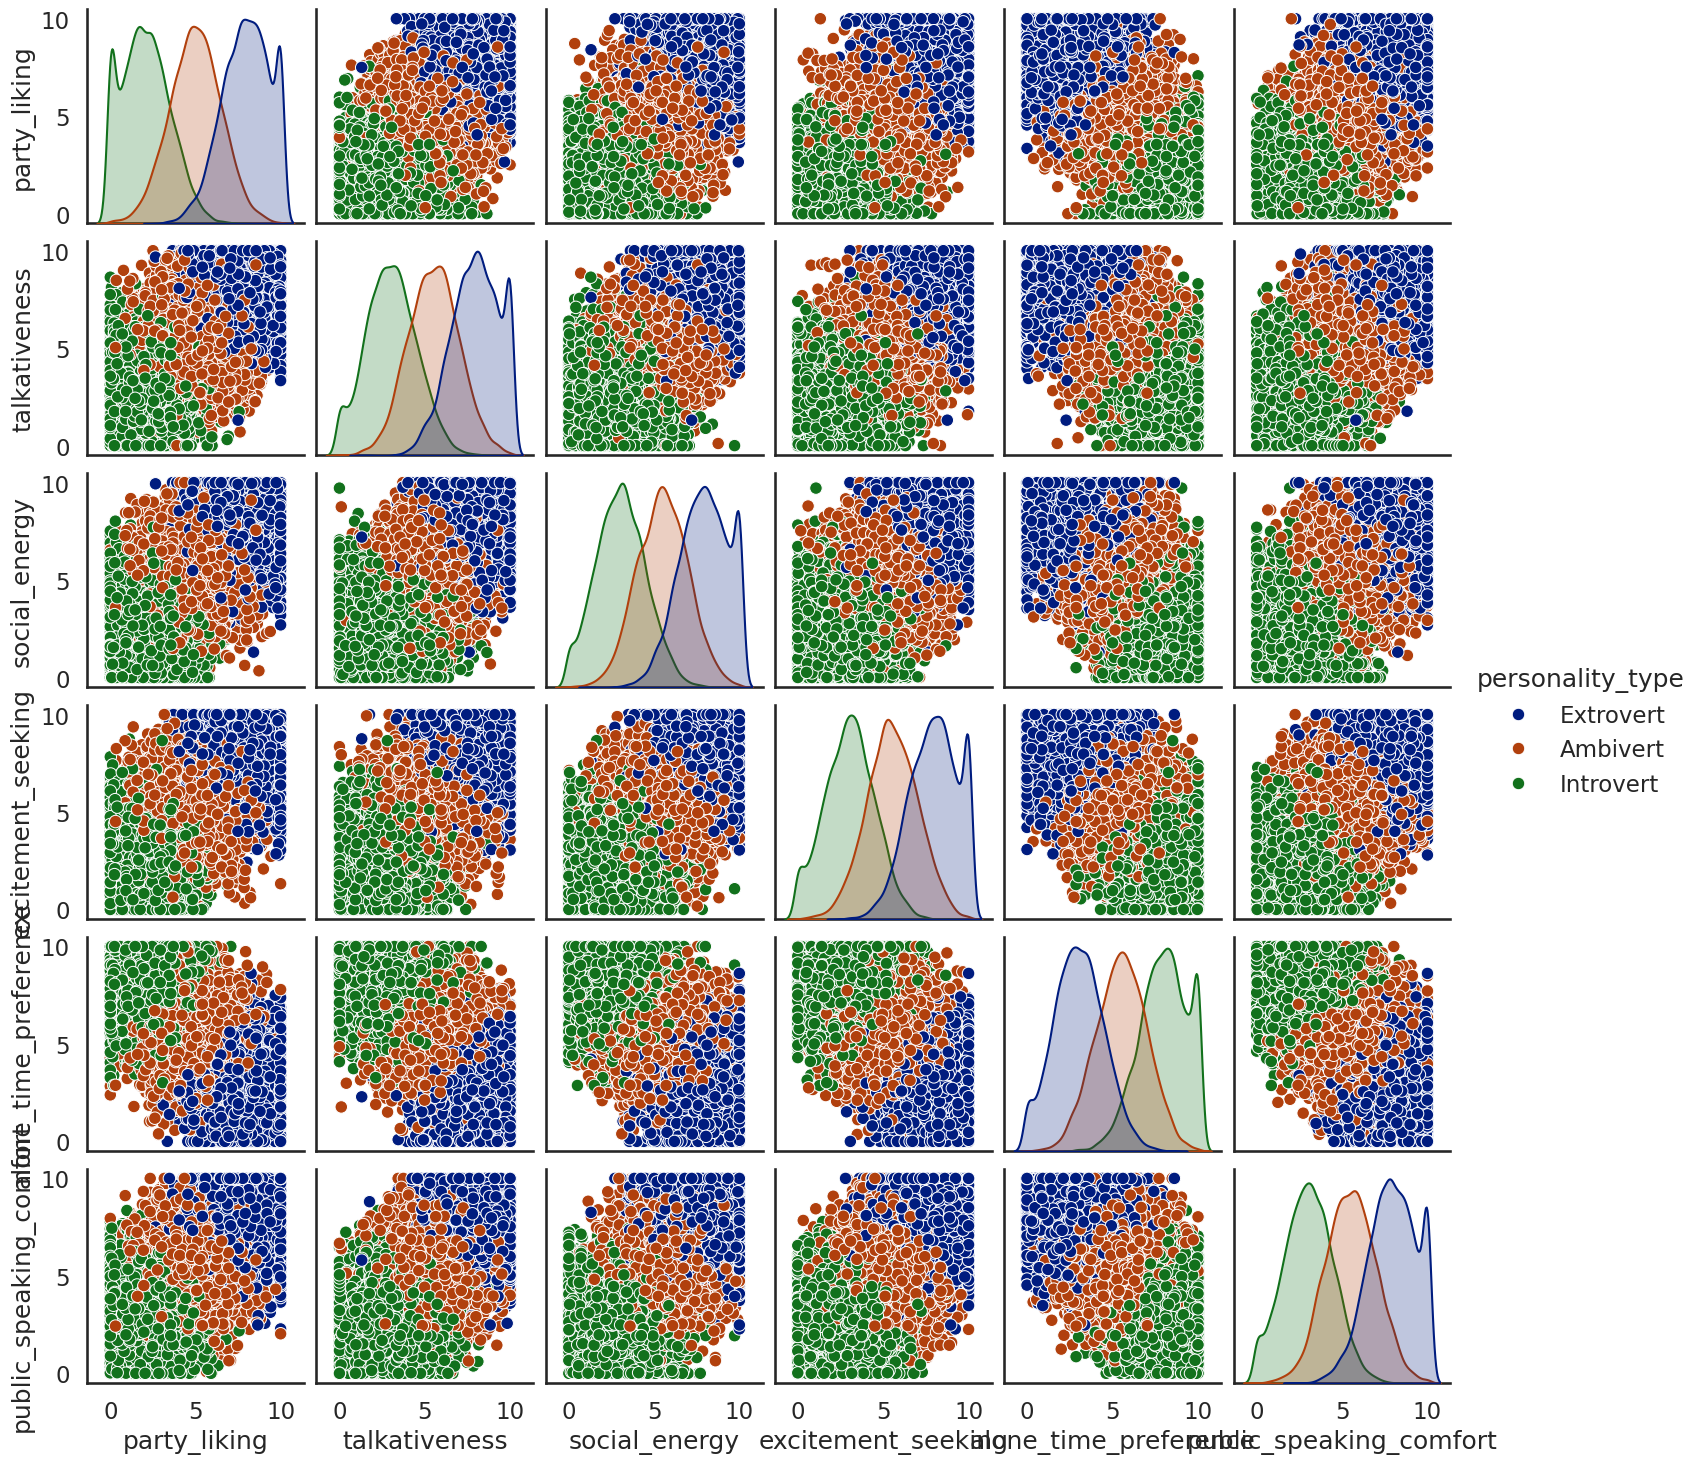

In [214]:
sns.set_context('talk')
sns.pairplot(personality, hue='personality_type');

<b>Explanation of visualization: </b> The pair plot shown above provides a clear view of the relationships among various personality features. There are some scatterplots that shows a positive correlations among some features like party liking and public speaking, and excitment and social energy.

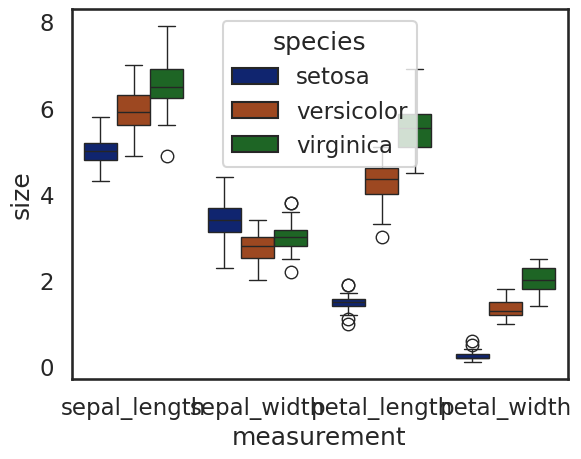

In [215]:
sns.boxplot(x='measurement', y='size',
            hue='species', data=plot_data);

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'party_liking'),
  Text(1, 0, 'talkativeness'),
  Text(2, 0, 'social_energy'),
  Text(3, 0, 'excitement_seeking'),
  Text(4, 0, 'alone_time_preference'),
  Text(5, 0, 'public_speaking_comfort')])

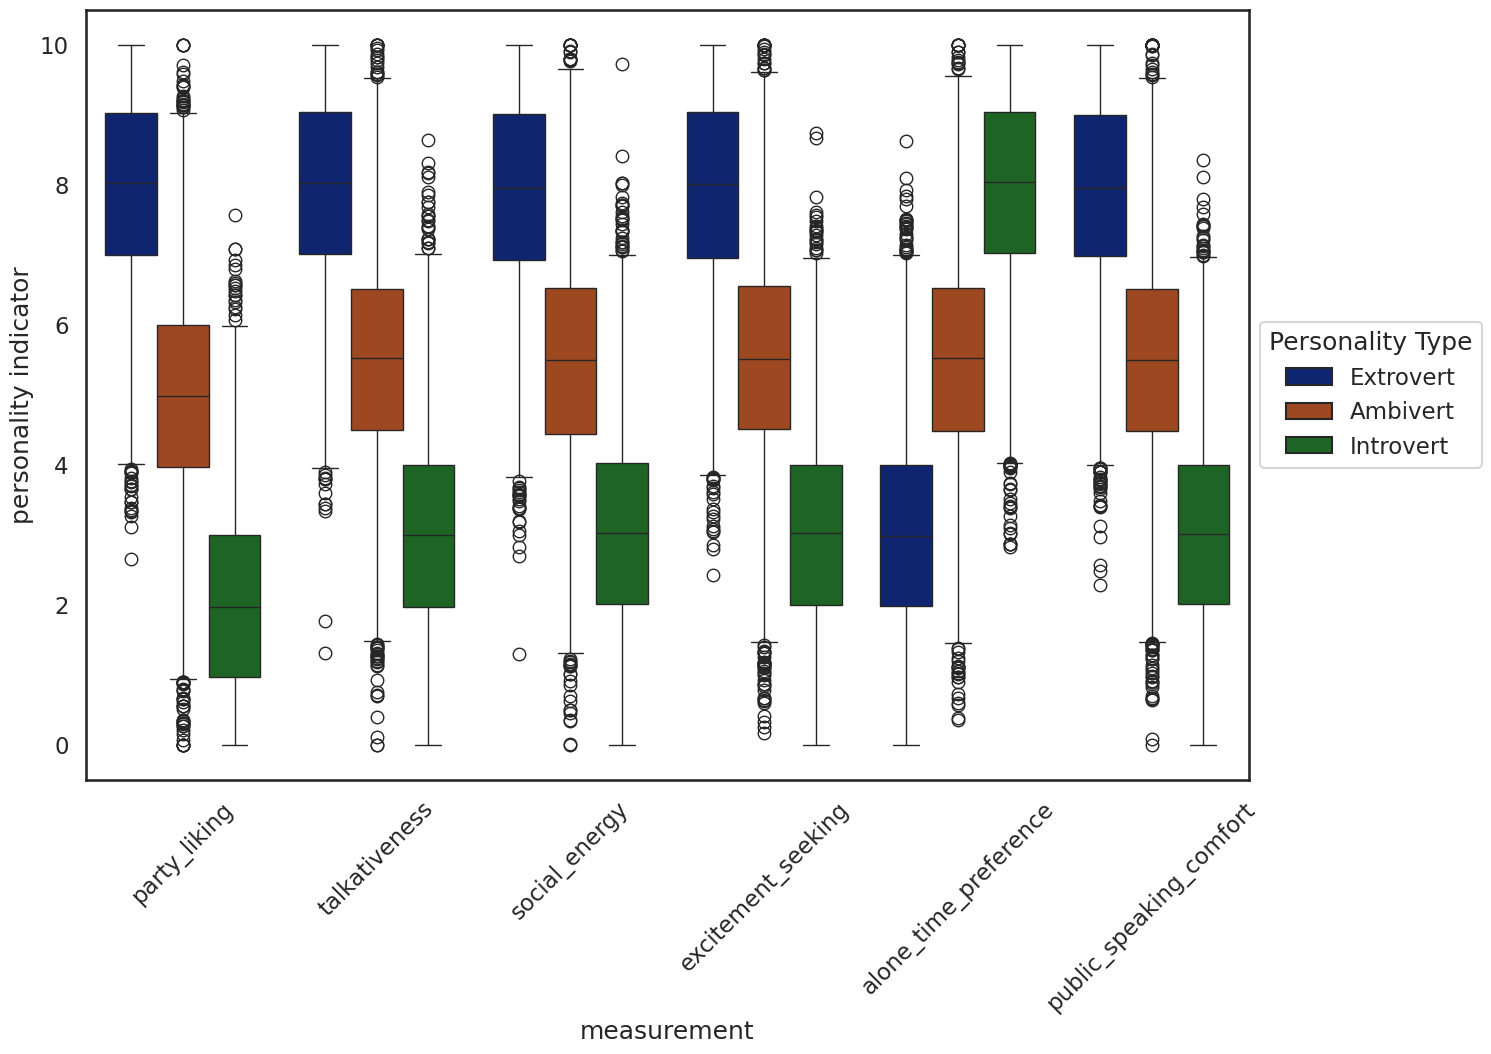

In [216]:
# CREATE A SINGLE BOX PLOT FOR EACH FEATURE

plot_data = (personality
             .set_index('personality_type')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'personality indicator', 'level_1':'measurement'})
            )

plot_data.head()

plt.figure(figsize = (15,10))
sns.boxplot(x = "measurement", y= 'personality indicator', hue = "personality_type",data = plot_data)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Personality Type')
plt.xticks(rotation = 45)

# The box plot shown below illustrate the distribution of personality indicator across the differnt personality types. It also shows the outliers in the dataset by observing the dots that is out of the box plots.

In [227]:
# create a radar chart

radar_en = [col for col in features]

# Group by personality_type and find the mean on each features
mean_traits = personality.groupby('personality_type')[radar_en].mean().reset_index()

# Transpose data for radar chart
melted = mean_traits.melt(id_vars='personality_type', var_name='Trait', value_name='Average')
fig = px.line_polar(melted, r='Average', theta='Trait', color='personality_type',line_close=True, template='plotly_dark', title='stats of differnt personalities')
fig.update_traces(fill='toself')
fig.show()

# The radar chart shown below compares the different kinds of personality in the overall features. Here, we can see that introverts has the highest score when it comes to alone time preference.
# While ambivert shows a balance score on all features. Lastly, Extrovert has the highest score on every aspect of the features except the alone time preference.

<font size = 6>Conclusion</font>


After completing the hands on activity, I was able to demonstrate the different tools that is use in machine learning such as seaborn, plotly, pandas, and matplotlib libraries. I was able to recall the ETL pipeline that we are conducting in every datasets during my previous elective course. Lastly I was able to visualize data in a form of different kinds of graphs using the matplotlub, seaborn, and plotly.